# Predictive Model

In [2]:
# imports

import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 14})

In [3]:
#Reading the data
df = pd.read_csv("analysed_customer_booking.csv", index_col=0)

In [4]:
df = df.reset_index(drop=True)

In [5]:
df

,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49987,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49988,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49989,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49990,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


We will use one hot encode for the categorical columns.

In [6]:
df_final = df

In [7]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)



In [8]:
#drop categorical columns now
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [9]:
#store the label for supervised learning
label = df['booking_complete']

In [10]:
df_final = df_final.drop('booking_complete', axis=1)

In [11]:
df_final

,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49987,27,6,9,6,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49988,111,6,4,7,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49989,24,6,22,6,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49990,15,6,11,1,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


## Normalizaing the values

In [12]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df_final)

In [13]:
#create a dataframe of scled data
scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)

In [14]:
# add the labels back to the dataframe
scaled_df['label']  = label

In [15]:
scaled_df

,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,1.964934,-0.119386,-0.381721,1.096773,0.703609,-0.649993,-0.863477,-1.174125,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
1,0.301163,-0.089878,-1.120714,1.096773,-1.421244,-0.649993,-0.863477,-1.174125,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
2,1.754190,-0.030863,1.465761,-0.408660,0.703609,1.538479,-0.863477,-1.174125,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
3,0.123694,0.234707,-0.935966,1.096773,-1.421244,-0.649993,1.158109,-1.174125,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
4,-0.186876,-0.030863,1.096264,-0.408660,0.703609,-0.649993,1.158109,-1.174125,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49987,-0.641640,-0.502987,-0.012225,1.096773,0.703609,-0.649993,1.158109,-1.107318,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
49988,0.290071,-0.502987,-0.935966,1.598584,-1.421244,-0.649993,-0.863477,-1.107318,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
49989,-0.674916,-0.502987,2.389502,1.096773,-1.421244,-0.649993,1.158109,-1.107318,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
49990,-0.774742,-0.502987,0.357271,-1.412282,0.703609,-0.649993,1.158109,-1.107318,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0


## Correlation matrix


<AxesSubplot:>

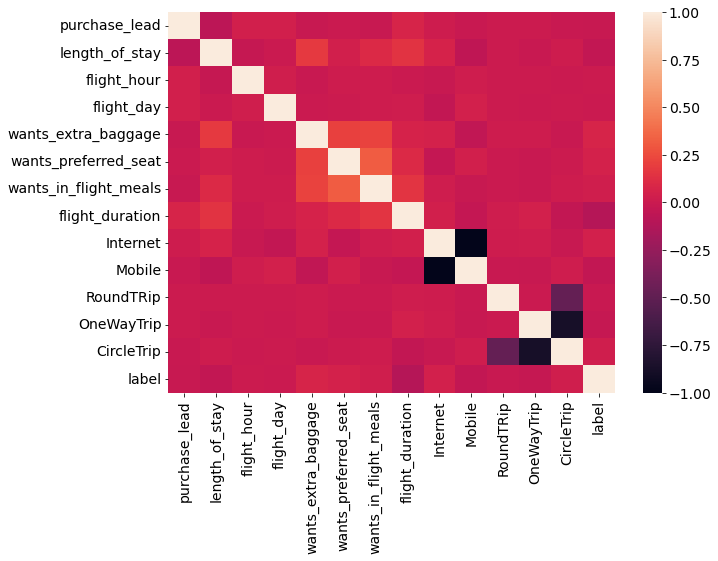

In [16]:
corr = scaled_df.corr()

plt.figure(figsize=(10,7))

#plot the heatmap
sns.heatmap(corr)

Now we can split the dataset into train and test sets.



### **Splitting Train and Test Data**

In [17]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [18]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [19]:

"""
    Create functions to fit and predict the values of whether customer would complete the booking.
    Also functions with metrics to evaluate the model prediction.

"""

def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

## **Random Forest Classifier**

In [20]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

### Checking Training accuracy

In [21]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.72 respectively


0.9335383692146125

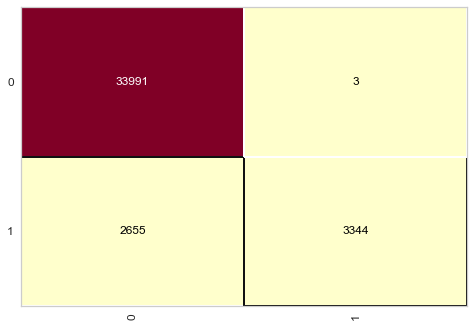

In [22]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

### Checking Testing accuracy

In [23]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.85, 0.42 and 0.08 respectively


0.8497849784978497

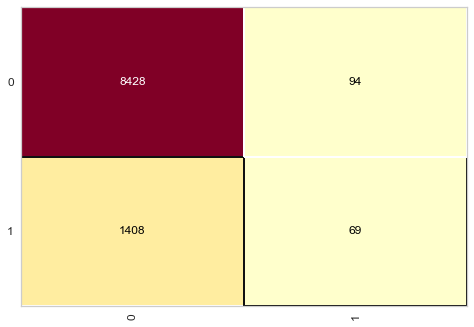

In [24]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

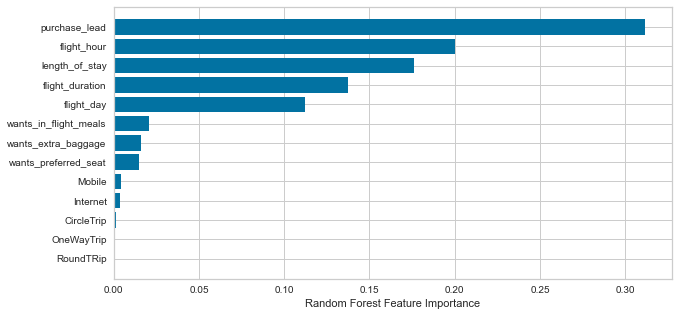

In [25]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

One major problem behind getting low F1 score is imbalanced dataset. We have higher entries that are classified 0 than 1. We could reduce the number of entries that are classified 0 to be equal around the number of entries that are classified as 1. 

## Balancing the dataset

In [26]:
scaled_df.label.value_counts()

0    42516
1     7476
Name: label, dtype: int64

In [27]:
#create a dataframe having all labels 0 with 10000 samples
scaled_df_0 = scaled_df[scaled_df.label ==0].sample(n=8000)

In [28]:
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)

In [29]:
#shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [30]:
scaled_df_new

,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.500815,1.444523,-1.120714,1.096773,-1.421244,-0.649993,-0.863477,0.870177,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
1,0.290071,0.205199,0.357271,1.598584,0.703609,-0.649993,-0.863477,-1.741987,0.355746,-0.355746,-0.048226,-0.088327,0.100816,1
2,-0.830201,-0.148894,-0.751218,0.594962,-1.421244,-0.649993,-0.863477,0.870177,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
3,-0.397621,-0.562002,-0.381721,-0.408660,-1.421244,-0.649993,-0.863477,0.195424,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
4,-0.419804,-0.060371,0.726768,-1.412282,0.703609,1.538479,1.158109,-1.107318,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15471,-0.131417,0.234707,-1.674959,-0.910471,0.703609,-0.649993,1.158109,-1.688541,0.355746,-0.355746,-0.048226,-0.088327,0.100816,1
15472,-0.319978,0.441261,-0.935966,0.594962,0.703609,-0.649993,-0.863477,-1.301059,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0
15473,1.476894,-0.591510,0.172523,-0.408660,-1.421244,-0.649993,-0.863477,-0.439245,0.355746,-0.355746,-0.048226,-0.088327,0.100816,1
15474,-0.719283,1.798616,0.726768,-0.910471,0.703609,1.538479,1.158109,-1.107318,0.355746,-0.355746,-0.048226,-0.088327,0.100816,0


In [31]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [32]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

In [33]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively") 

Accuracy, precision, recall and f1-score for training data are 0.62, 0.61, 0.59, 0.65 and 0.6 respectively


0.6233850129198967

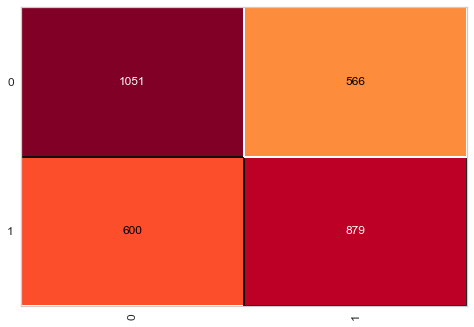

In [34]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

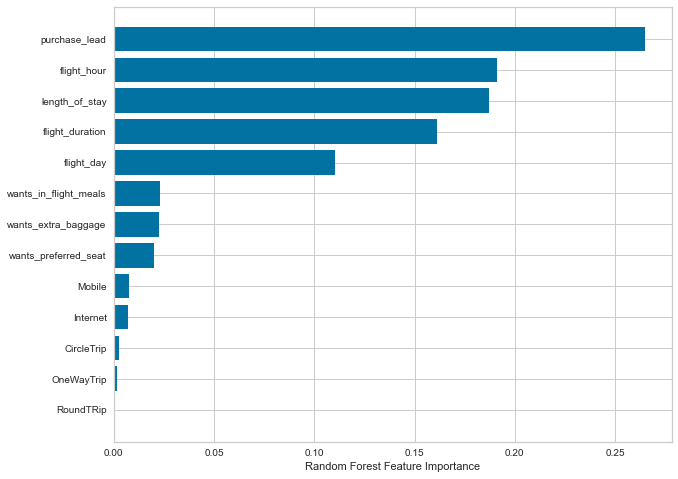

In [35]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.savefig("randforest.png")